In [1]:
import pandas as pd
import spacy
import numpy as np

In [2]:
df=pd.read_json("news_dataset.json")
df.head()

,text,category
0,Watching Schrödinger's Cat Die University of C...,SCIENCE
1,WATCH: Freaky Vortex Opens Up In Flooded Lake,SCIENCE
2,Entrepreneurs Today Don't Need a Big Budget to...,BUSINESS
3,These Roads Could Recharge Your Electric Car A...,BUSINESS
4,Civilian 'Guard' Fires Gun While 'Protecting' ...,CRIME


In [3]:
df.shape

(12695, 2)

In [4]:
df.isnull().sum()

text        0
category    0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12695 entries, 0 to 12694
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   text      12695 non-null  object
 1   category  12695 non-null  object
dtypes: object(2)
memory usage: 297.5+ KB


In [6]:
df.category.unique()

array(['SCIENCE', 'BUSINESS', 'CRIME', 'SPORTS'], dtype=object)

In [7]:
df["new_category"]=df["category"].map({'SCIENCE':0,'BUSINESS':1,'CRIME':2,'SPORTS':3})
df.head()

,text,category,new_category
0,Watching Schrödinger's Cat Die University of C...,SCIENCE,0
1,WATCH: Freaky Vortex Opens Up In Flooded Lake,SCIENCE,0
2,Entrepreneurs Today Don't Need a Big Budget to...,BUSINESS,1
3,These Roads Could Recharge Your Electric Car A...,BUSINESS,1
4,Civilian 'Guard' Fires Gun While 'Protecting' ...,CRIME,2


In [8]:
df.new_category.unique()

array([0, 1, 2, 3], dtype=int64)

In [9]:
df.new_category.value_counts()

1    4254
3    4167
2    2893
0    1381
Name: new_category, dtype: int64

In [11]:
min_value=df.new_category.value_counts().min()

In [14]:
business_df=df[df["category"]=="BUSINESS"].sample(min_value)
crime_df=df[df["category"]=="CRIME"].sample(min_value)
sports_df=df[df["category"]=="SPORTS"].sample(min_value)
science_df=df[df["category"]=="SCIENCE"].sample(min_value)

In [15]:
lst=[business_df,crime_df,sports_df,science_df]

In [17]:
df2=pd.concat(lst,ignore_index=True,axis=0)

,text,category,new_category
0,Wells Fargo Scandal A Setback To Lobbying Effo...,BUSINESS,1
1,FedEx Admits That Not All Packages Made It In ...,BUSINESS,1
2,"I'll Have My Beer For-Profit, Please I was in ...",BUSINESS,1
3,Ralph Lauren's Native American Ads Reveal Sad ...,BUSINESS,1
4,"Fed Upgrades The Economy, But Will Be 'Patient...",BUSINESS,1


In [20]:
df2.head(10)

,text,category,new_category
0,Wells Fargo Scandal A Setback To Lobbying Effo...,BUSINESS,1
1,FedEx Admits That Not All Packages Made It In ...,BUSINESS,1
2,"I'll Have My Beer For-Profit, Please I was in ...",BUSINESS,1
3,Ralph Lauren's Native American Ads Reveal Sad ...,BUSINESS,1
4,"Fed Upgrades The Economy, But Will Be 'Patient...",BUSINESS,1
5,Johnson & Johnson's Star Witness Makes A Stunn...,BUSINESS,1
6,States Where The Middle Class Is Dying,BUSINESS,1
7,Waymo Is Quietly Winning The Self-Driving Car ...,BUSINESS,1
8,"Dodd-Frank at Four On July 21, 2010, the Dodd-...",BUSINESS,1
9,Imran Ali Khan: Align Your Profession With You...,BUSINESS,1


In [18]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5524 entries, 0 to 5523
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   text          5524 non-null   object
 1   category      5524 non-null   object
 2   new_category  5524 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 129.6+ KB


In [19]:
4*min_value

5524

# Data Frame Kariştirma

In [21]:
# bir data frame nasil karistirilir

In [22]:
df3=df2.sample(frac=1)  # !!!!!!!!!!!!!!!!!!!!!!!!!!!
df3.head()

,text,category,new_category
1215,"Women in Business Q&A: Kimberly Leach Johnson,...",BUSINESS,1
4044,Keith Olbermann Not Exactly Thrilled Penn Stat...,SPORTS,3
2762,"'Philly Special,' And How Doug Pederson Out-Co...",SPORTS,3
510,3 Habits Killing Your Productivity In our atte...,BUSINESS,1
2759,TSA Seizes 81 Pounds Of Pot At Airport,CRIME,2


In [24]:
display(df2[:5],df3[:5])

,text,category,new_category
0,Wells Fargo Scandal A Setback To Lobbying Effo...,BUSINESS,1
1,FedEx Admits That Not All Packages Made It In ...,BUSINESS,1
2,"I'll Have My Beer For-Profit, Please I was in ...",BUSINESS,1
3,Ralph Lauren's Native American Ads Reveal Sad ...,BUSINESS,1
4,"Fed Upgrades The Economy, But Will Be 'Patient...",BUSINESS,1


,text,category,new_category
1215,"Women in Business Q&A: Kimberly Leach Johnson,...",BUSINESS,1
4044,Keith Olbermann Not Exactly Thrilled Penn Stat...,SPORTS,3
2762,"'Philly Special,' And How Doug Pederson Out-Co...",SPORTS,3
510,3 Habits Killing Your Productivity In our atte...,BUSINESS,1
2759,TSA Seizes 81 Pounds Of Pot At Airport,CRIME,2


In [25]:
nlp=spacy.load("en_core_web_lg")

In [26]:
def preprocess_txt(text):
    filtered_values=[]
    doc=nlp(text)
    
    for token in doc:
        if token.is_stop or token.is_punct:
            continue
        filtered_values.append(token.lemma_)
    return " ".join(filtered_values)

In [ ]:
#create a new column "preprocessed_text" which store the clean form of given text [use apply and lambda function]

In [27]:
df3["preprocessed_text"]=df3["text"].apply(lambda text: preprocess_txt(text))
df3.head()

,text,category,new_category,preprocessed_text
1215,"Women in Business Q&A: Kimberly Leach Johnson,...",BUSINESS,1,woman Business Q&A Kimberly Leach Johnson Firm...
4044,Keith Olbermann Not Exactly Thrilled Penn Stat...,SPORTS,3,Keith Olbermann exactly thrilled Penn State ge...
2762,"'Philly Special,' And How Doug Pederson Out-Co...",SPORTS,3,Philly Special Doug Pederson coach Bill Belich...
510,3 Habits Killing Your Productivity In our atte...,BUSINESS,1,3 habit kill productivity attempt well job acc...
2759,TSA Seizes 81 Pounds Of Pot At Airport,CRIME,2,TSA Seizes 81 pound Pot Airport


In [28]:
df3["vector"]=df3["preprocessed_text"].apply(lambda x: nlp(x).vector)
df3.head()

,text,category,new_category,preprocessed_text,vector
1215,"Women in Business Q&A: Kimberly Leach Johnson,...",BUSINESS,1,woman Business Q&A Kimberly Leach Johnson Firm...,"[-0.9867314, -0.95803154, -0.64731354, 0.77050..."
4044,Keith Olbermann Not Exactly Thrilled Penn Stat...,SPORTS,3,Keith Olbermann exactly thrilled Penn State ge...,"[-2.4049623, 1.0576682, -0.36434752, -0.100362..."
2762,"'Philly Special,' And How Doug Pederson Out-Co...",SPORTS,3,Philly Special Doug Pederson coach Bill Belich...,"[-1.1958331, 2.5502446, -0.67635804, 1.2271678..."
510,3 Habits Killing Your Productivity In our atte...,BUSINESS,1,3 habit kill productivity attempt well job acc...,"[0.57608825, 0.80416054, -2.6196957, 1.4064559..."
2759,TSA Seizes 81 Pounds Of Pot At Airport,CRIME,2,TSA Seizes 81 pound Pot Airport,"[-1.0116817, -0.67574733, 0.33540002, 2.095366..."


In [29]:
from sklearn.model_selection import train_test_split


In [34]:
X_train,X_test,y_train,y_test=train_test_split(df3.vector.values,
                                               df3.new_category,
                                               test_size=0.2,
                                               random_state=4,
                                               stratify=df3.new_category)

In [ ]:
#reshapes the X_train and X_test using 'stack' function of numpy. Store the result in new variables "X_train_2d" and "X_test_2d"


In [35]:
print("Shape of X_train before reshaping: ", X_train.shape)
print("Shape of X_test before reshaping: ", X_test.shape)

Shape of X_train before reshaping:  (4419,)
Shape of X_test before reshaping:  (1105,)


In [36]:
X_train_2d=np.stack(X_train)
X_test_2d=np.stack(X_test)

print("Shape of X_train after reshaping: ", X_train_2d.shape)
print("Shape of X_test after reshaping: ", X_test_2d.shape)

Shape of X_train after reshaping:  (4419, 300)
Shape of X_test after reshaping:  (1105, 300)


# Attempt 1:

In [38]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

In [39]:
clf=DecisionTreeClassifier()

clf.fit(X_train_2d,y_train)

y_pred=clf.predict(X_test_2d)

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.60      0.63      0.61       276
           1       0.60      0.58      0.59       276
           2       0.64      0.64      0.64       277
           3       0.67      0.67      0.67       276

    accuracy                           0.63      1105
   macro avg       0.63      0.63      0.63      1105
weighted avg       0.63      0.63      0.63      1105



# Attempt 2:

In [40]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import MinMaxScaler

In [41]:
scaler=MinMaxScaler()

In [42]:
X_train_scaled=scaler.fit_transform(X_train_2d)
X_test_scaled=scaler.fit_transform(X_test_2d)

In [43]:
clf=MultinomialNB()

clf.fit(X_train_scaled,y_train)

y_pred=clf.predict(X_test_scaled)

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.69      0.71      0.70       276
           1       0.77      0.56      0.65       276
           2       0.85      0.78      0.81       277
           3       0.62      0.83      0.71       276

    accuracy                           0.72      1105
   macro avg       0.73      0.72      0.72      1105
weighted avg       0.73      0.72      0.72      1105



# Attempt 3:

In [44]:
from sklearn.neighbors import KNeighborsClassifier

In [46]:
clf=KNeighborsClassifier(n_neighbors = 5, metric = 'euclidean')
clf.fit(X_train_2d,y_train)
y_pred=clf.predict(X_test_2d)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.77      0.76      0.77       276
           1       0.76      0.76      0.76       276
           2       0.79      0.90      0.84       277
           3       0.86      0.76      0.81       276

    accuracy                           0.79      1105
   macro avg       0.80      0.79      0.79      1105
weighted avg       0.80      0.79      0.79      1105



# Attempt 4:

In [47]:
from sklearn.ensemble import RandomForestClassifier

In [48]:
clf=RandomForestClassifier()

clf.fit(X_train_2d,y_train)

y_pred=clf.predict(X_test_2d)

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.80      0.79      0.79       276
           1       0.80      0.79      0.79       276
           2       0.82      0.87      0.84       277
           3       0.83      0.80      0.81       276

    accuracy                           0.81      1105
   macro avg       0.81      0.81      0.81      1105
weighted avg       0.81      0.81      0.81      1105



# Attempt 5:

In [49]:
from sklearn.ensemble import GradientBoostingClassifier

In [50]:
clf=GradientBoostingClassifier()

clf.fit(X_train_2d,y_train)

y_pred=clf.predict(X_test_2d)

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.84      0.83      0.83       276
           1       0.83      0.85      0.84       276
           2       0.86      0.87      0.87       277
           3       0.87      0.85      0.86       276

    accuracy                           0.85      1105
   macro avg       0.85      0.85      0.85      1105
weighted avg       0.85      0.85      0.85      1105



In [51]:
from matplotlib import pyplot as plt
import seaborn as sn

In [52]:
from sklearn.metrics import confusion_matrix

In [53]:
cm=confusion_matrix(y_test,y_pred)
cm

array([[228,  24,   9,  15],
       [ 21, 235,  12,   8],
       [ 15,   8, 242,  12],
       [  8,  15,  19, 234]], dtype=int64)

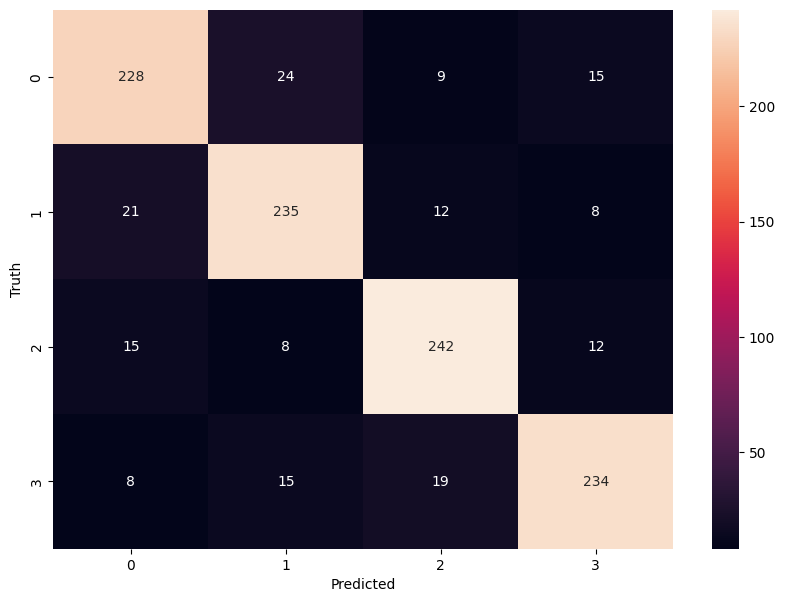

In [55]:
plt.figure(figsize=(10,7))
sn.heatmap(cm,annot=True,fmt="d")
plt.xlabel("Predicted")
plt.ylabel("Truth");